In [58]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn import neighbors
from sklearn import linear_model, preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./dataset/train_label_balanced.csv")
df.shape

(3300, 82)

In [3]:
#df = df.loc[df['SalePrice_label'].between(6, 8)]
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_label
0,30,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,WD,Normal,68500,1
1,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000,1
2,265,30,RM,30.0,5232,Pave,Grvl,IR3,Bnk,AllPub,...,NaN,NaN,NaN,0,6,2008,WD,Normal,73000,1
3,376,30,RL,NaN,10020,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,NaN,0,3,2009,WD,Normal,61000,1
4,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000,1


<AxesSubplot:ylabel='Frequency'>

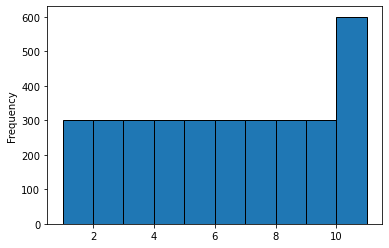

In [4]:
df['SalePrice_label'].plot(kind='hist', edgecolor='black') # 

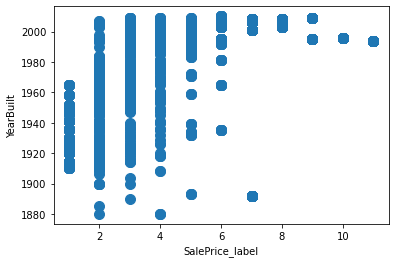

In [5]:
df.plot.scatter(x = 'SalePrice_label', y = 'YearBuilt', s = 100);

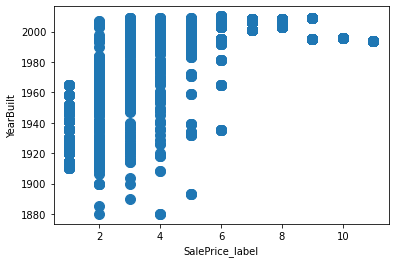

In [6]:
# Outilers

df.drop(df[(df['YearBuilt'] < 1900) & (df['SalePrice_label'] == 6)].index, inplace=True)
df.drop(df[(df['YearBuilt'] < 1900) & (df['SalePrice_label'] == 7)].index, inplace=True)
df.drop(df[(df['YearBuilt'] < 1900) & (df['SalePrice_label'] == 10)].index, inplace=True)
df.plot.scatter(x = 'SalePrice_label', y = 'YearBuilt', s = 100);


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 0 to 3299
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               3250 non-null   int64  
 1   MSSubClass       3250 non-null   int64  
 2   MSZoning         3250 non-null   object 
 3   LotFrontage      2956 non-null   float64
 4   LotArea          3250 non-null   int64  
 5   Street           3250 non-null   object 
 6   Alley            129 non-null    object 
 7   LotShape         3250 non-null   object 
 8   LandContour      3250 non-null   object 
 9   Utilities        3250 non-null   object 
 10  LotConfig        3250 non-null   object 
 11  LandSlope        3250 non-null   object 
 12  Neighborhood     3250 non-null   object 
 13  Condition1       3250 non-null   object 
 14  Condition2       3250 non-null   object 
 15  BldgType         3250 non-null   object 
 16  HouseStyle       3250 non-null   object 
 17  OverallQual   

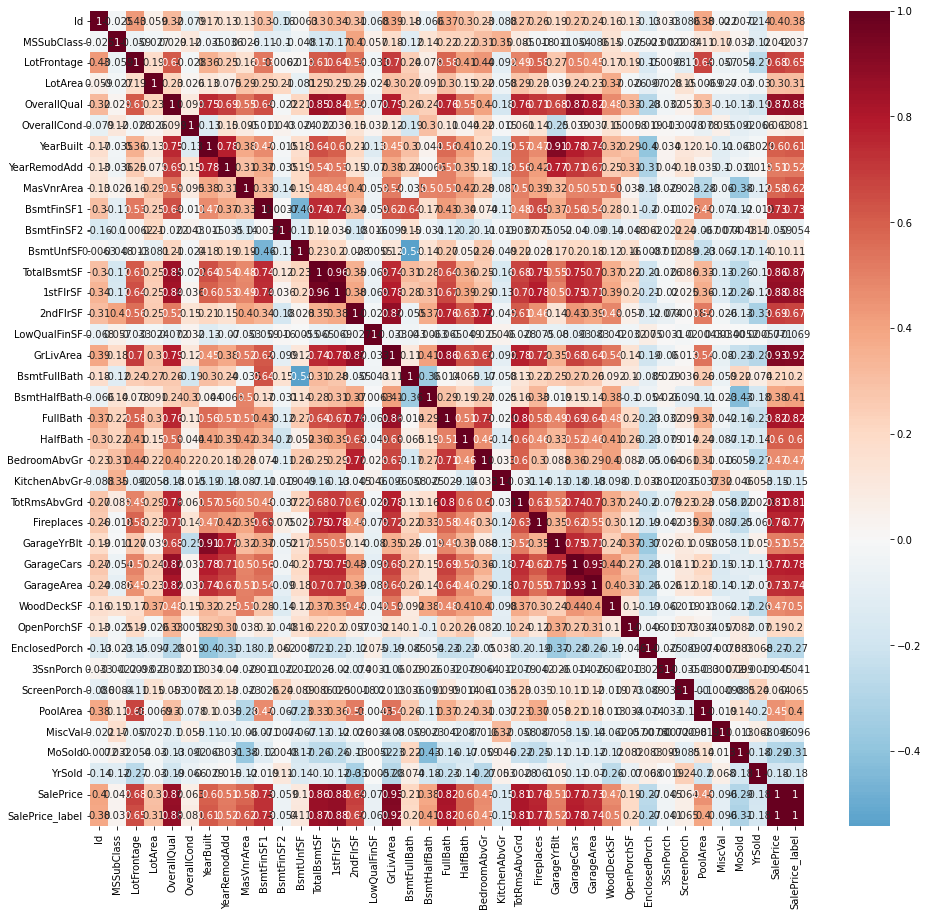

In [8]:
plt.figure(figsize=(16, 15))

sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', center=0);

In [9]:
df = df[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'YearBuilt', 'SalePrice', 'SalePrice_label']]

df.head()


,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,YearBuilt,SalePrice,SalePrice_label
0,4,520,520,520,1,4,0,1,240,1927,68500,1
1,4,649,649,1317,1,6,0,1,250,1920,40000,1
2,5,680,764,764,1,4,0,2,504,1925,73000,1
3,1,683,904,904,0,4,0,0,0,1922,61000,1
4,5,961,1077,1077,1,6,0,1,338,1920,67000,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 0 to 3299
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OverallQual      3250 non-null   int64
 1   TotalBsmtSF      3250 non-null   int64
 2   1stFlrSF         3250 non-null   int64
 3   GrLivArea        3250 non-null   int64
 4   FullBath         3250 non-null   int64
 5   TotRmsAbvGrd     3250 non-null   int64
 6   Fireplaces       3250 non-null   int64
 7   GarageCars       3250 non-null   int64
 8   GarageArea       3250 non-null   int64
 9   YearBuilt        3250 non-null   int64
 10  SalePrice        3250 non-null   int64
 11  SalePrice_label  3250 non-null   int64
dtypes: int64(12)
memory usage: 459.1 KB


In [11]:
df_num = df.select_dtypes(include='number')

In [12]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 0 to 3299
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OverallQual      3250 non-null   int64
 1   TotalBsmtSF      3250 non-null   int64
 2   1stFlrSF         3250 non-null   int64
 3   GrLivArea        3250 non-null   int64
 4   FullBath         3250 non-null   int64
 5   TotRmsAbvGrd     3250 non-null   int64
 6   Fireplaces       3250 non-null   int64
 7   GarageCars       3250 non-null   int64
 8   GarageArea       3250 non-null   int64
 9   YearBuilt        3250 non-null   int64
 10  SalePrice        3250 non-null   int64
 11  SalePrice_label  3250 non-null   int64
dtypes: int64(12)
memory usage: 459.1 KB


In [13]:
#df_num = df_num.dropna()
#df_num.shape

df_num.fillna(df_num.mean(), inplace=True)
df_num.shape

(3250, 12)

In [14]:
#df_num = df_num[['LotArea', 'YearBuilt', 'GrLivArea', 'GarageCars','SalePrice_label']]
#df_num.head()

### Discrétiser YearBuilt

<AxesSubplot:ylabel='Frequency'>

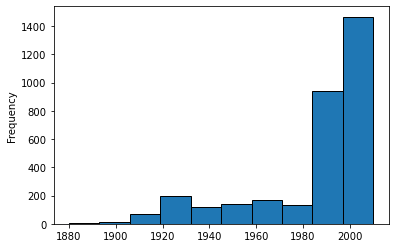

In [15]:
df_num['YearBuilt'].plot(kind='hist', edgecolor='black') #(kind='kde')

In [16]:
df_num_YearBuilt = pd.cut(x      = df_num['YearBuilt'],
                  bins   = [1800, 1910, 1950, 1994, 1996, 2003, 2006, 2008, 2009, 2050],
                  labels = ['ancien+++', 'ancien++', 'ancien+', 'ancien', 'recent', 'recent+', 'recent++', 'recent+++', 'top'])


pd.crosstab(df_num['SalePrice_label'], df_num_YearBuilt)

YearBuilt,ancien+++,ancien++,ancien+,ancien,recent,recent+,recent++,recent+++,top
SalePrice_label,,,,,,,,,
1,12,250,38,0,0,0,0,0,0
2,18,105,163,1,3,8,2,0,0
3,3,29,133,11,60,46,10,8,0
4,5,18,76,18,75,69,33,6,0
5,4,14,53,12,48,96,69,4,0
6,0,10,40,20,20,100,80,20,10
7,0,0,0,0,50,50,150,0,0
8,0,0,0,0,75,75,150,0,0
9,0,0,0,150,0,0,0,150,0


### Discrétiser OverallQual

<AxesSubplot:ylabel='Frequency'>

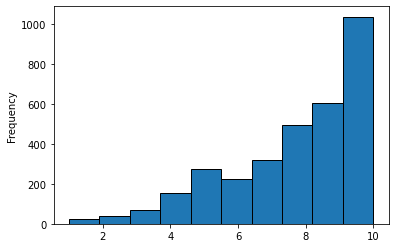

In [17]:
df_num['OverallQual'].plot(kind='hist', edgecolor='black')

In [18]:
df_num_OverallQual = df_num['OverallQual']


pd.crosstab(df_num['SalePrice_label'], df_num_OverallQual)

OverallQual,1,2,3,4,5,6,7,8,9,10
SalePrice_label,,,,,,,,,,
1,26,37,61,100,76,0,0,0,0,0
2,0,0,7,50,149,79,15,0,0,0
3,0,0,0,1,47,121,114,16,0,1
4,0,0,0,2,3,26,125,136,8,0
5,0,0,0,0,0,0,48,150,90,12
6,0,0,0,0,0,0,20,120,110,50
7,0,0,0,0,0,0,0,0,100,150
8,0,0,0,0,0,0,0,75,150,75
9,0,0,0,0,0,0,0,0,150,150


### Discrétiser Fireplaces

<AxesSubplot:ylabel='Frequency'>

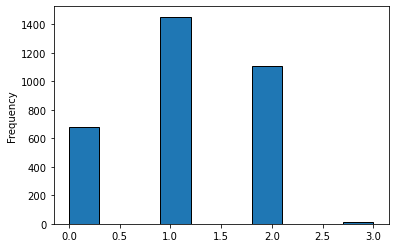

In [19]:
df_num['Fireplaces'].plot(kind='hist', edgecolor='black')


In [20]:
df_num_Fireplaces = df_num['Fireplaces']


pd.crosstab(df_num['SalePrice_label'], df_num_Fireplaces)

Fireplaces,0,1,2,3
SalePrice_label,,,,
1,274,26,0,0
2,220,69,11,0
3,119,150,29,2
4,47,219,34,0
5,18,214,60,8
6,0,250,50,0
7,0,150,100,0
8,0,225,75,0
9,0,150,150,0


### Discrétiser FullBath

<AxesSubplot:ylabel='Frequency'>

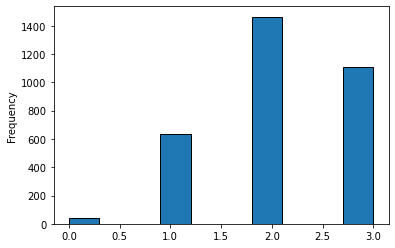

In [21]:
df_num['FullBath'].plot(kind='hist', edgecolor='black')

In [22]:
df_num_FullBath = df_num['FullBath']

pd.crosstab(df_num['SalePrice_label'], df_num_FullBath)

FullBath,0,1,2,3
SalePrice_label,,,,
1,25,250,25,0
2,1,241,58,0
3,2,81,212,5
4,1,21,268,10
5,0,22,246,32
6,10,20,230,40
7,0,0,200,50
8,0,0,75,225
9,0,0,150,150


### Discrétiser GarageCars

<AxesSubplot:ylabel='Frequency'>

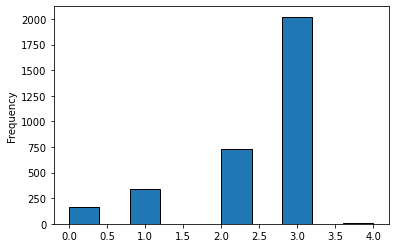

In [23]:
df_num['GarageCars'].plot(kind='hist', edgecolor='black')

In [24]:
df_num_GarageCars = pd.cut(x      = df_num['GarageCars'],
                  bins   = [1, 2, 3, 4, 5],
                  labels = ['petit', 'moyen', 'moyen+', 'grand'])


pd.crosstab(df_num['SalePrice_label'], df_num_GarageCars)

GarageCars,petit,moyen,moyen+
SalePrice_label,,,
1,37,0,0
2,106,4,0
3,256,7,1
4,190,98,2
5,97,203,0
6,40,260,0
7,0,250,0
8,0,300,0
9,0,300,0


## Dichotomisation

In [25]:
df_YearBuilt_dummies = pd.get_dummies(df_num_YearBuilt, prefix='YearBuilt')

In [26]:
df_OverallQual_dummies = pd.get_dummies(df_num_OverallQual, prefix='OverallQual')

In [27]:
df_Fireplaces_dummies = pd.get_dummies(df_num_Fireplaces, prefix='Fireplaces')

In [28]:
df_FullBath_dummies = pd.get_dummies(df_num_FullBath, prefix='FullBath')

In [29]:
df_GarageCars_dummies = pd.get_dummies(df_num_GarageCars, prefix='GarageCars')

### Standardisation, ou normalisation (Scale the data)

In [30]:
df_num_scaled = df_num[['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'TotRmsAbvGrd']]

scaler = preprocessing.StandardScaler().fit(df_num_scaled)
df_num_scaled[df_num_scaled.columns] = pd.DataFrame(scaler.transform(df_num_scaled), index=df_num_scaled.index)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
df_num_prepared = df_num_scaled.join(df_YearBuilt_dummies).join(df_num[['SalePrice_label', 'SalePrice']]).join(df_FullBath_dummies).join(df_OverallQual_dummies).join(df_Fireplaces_dummies).join(df_GarageCars_dummies)

In [32]:
df_num_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 0 to 3299
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalBsmtSF          3250 non-null   float64
 1   1stFlrSF             3250 non-null   float64
 2   GrLivArea            3250 non-null   float64
 3   GarageArea           3250 non-null   float64
 4   TotRmsAbvGrd         3250 non-null   float64
 5   YearBuilt_ancien+++  3250 non-null   uint8  
 6   YearBuilt_ancien++   3250 non-null   uint8  
 7   YearBuilt_ancien+    3250 non-null   uint8  
 8   YearBuilt_ancien     3250 non-null   uint8  
 9   YearBuilt_recent     3250 non-null   uint8  
 10  YearBuilt_recent+    3250 non-null   uint8  
 11  YearBuilt_recent++   3250 non-null   uint8  
 12  YearBuilt_recent+++  3250 non-null   uint8  
 13  YearBuilt_top        3250 non-null   uint8  
 14  SalePrice_label      3250 non-null   int64  
 15  SalePrice            3250 non-null   i

### Evolution du modèle

In [33]:
data = df_num_prepared.drop(['SalePrice_label', 'SalePrice'], axis=1)
#data.info()

In [34]:
#data = df_num_prepared.iloc[:,4:]

target = df_num_prepared['SalePrice_label']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 66) 

In [36]:
clf = linear_model.LogisticRegression(C = 10, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=10000)

In [37]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[79 16  0  0  0  0  0  0  0  0  0]
 [17 51  9  1  0  0  0  0  0  0  0]
 [ 0 11 72  8  1  0  1  0  0  0  0]
 [ 0  0 15 51 10  2  0  0  0  0  0]
 [ 0  0  3 18 58 11  0  0  0  0  0]
 [ 0  0  0  5 17 63  8  0  0  0  0]
 [ 0  0  0  0  0  0 70  0  0  0  0]
 [ 0  0  0  0  0  0  0 93  0  0  0]
 [ 0  0  0  0  0  0  0  0 93  0  0]
 [ 0  0  0  0  0  0  0  0  0 98  0]
 [ 0  0  0  0  0  0  0  0  0  0 94]]


In [38]:
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,1,2,3,4,5,6,7,8,9,10,11
Classe réelle,,,,,,,,,,,
1,79,16,0,0,0,0,0,0,0,0,0
2,17,51,9,1,0,0,0,0,0,0,0
3,0,11,72,8,1,0,1,0,0,0,0
4,0,0,15,51,10,2,0,0,0,0,0
5,0,0,3,18,58,11,0,0,0,0,0
6,0,0,0,5,17,63,8,0,0,0,0
7,0,0,0,0,0,0,70,0,0,0,0
8,0,0,0,0,0,0,0,93,0,0,0
9,0,0,0,0,0,0,0,0,93,0,0


#### Taux de bonnes prédictions du modèle

In [39]:
clf.score(X_test, y_test)

0.8430769230769231

#### rapport de classification de nos prédictions

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.83      0.83        95
           2       0.65      0.65      0.65        78
           3       0.73      0.77      0.75        93
           4       0.61      0.65      0.63        78
           5       0.67      0.64      0.66        90
           6       0.83      0.68      0.75        93
           7       0.89      1.00      0.94        70
           8       1.00      1.00      1.00        93
           9       1.00      1.00      1.00        93
          10       1.00      1.00      1.00        98
          11       1.00      1.00      1.00        94

    accuracy                           0.84       975
   macro avg       0.84      0.84      0.84       975
weighted avg       0.84      0.84      0.84       975



### Courbe ROC

In [41]:
probs = clf.predict_proba(X_test)

In [42]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1) # 

roc_auc = auc(fpr, tpr)

In [43]:
from collections import Counter
Counter(y_test)

Counter({4: 78,
         6: 93,
         2: 78,
         9: 93,
         11: 94,
         10: 98,
         3: 93,
         7: 70,
         5: 90,
         8: 93,
         1: 95})

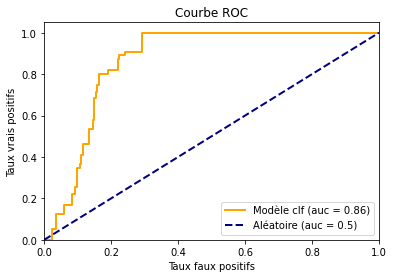

In [44]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange',
         lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

## SVM

In [45]:
from sklearn import svm

In [46]:
#clf = svm.SVC(gamma=0.5,  kernel='poly')
clf = svm.SVC(C=20, gamma=1,  kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=20, gamma=1)

In [47]:
clf.score(X_test, y_test)

0.9323076923076923

#### Moyenne et l'écart type de chaque colonne de X_train

In [56]:
print(X_train.mean(axis=0).head(10))

TotalBsmtSF           -0.002155
1stFlrSF              -0.000226
GrLivArea             -0.012375
GarageArea            -0.005372
TotRmsAbvGrd          -0.005180
YearBuilt_ancien+++    0.012747
YearBuilt_ancien++     0.130989
YearBuilt_ancien+      0.249670
YearBuilt_ancien       0.150330
YearBuilt_recent       0.108571
dtype: float64


In [55]:
print(X_train.std(axis=0).head(10))

TotalBsmtSF            0.996332
1stFlrSF               0.996332
GrLivArea              0.992336
GarageArea             1.007034
TotRmsAbvGrd           0.999627
YearBuilt_ancien+++    0.112206
YearBuilt_ancien++     0.337463
YearBuilt_ancien+      0.432917
YearBuilt_ancien       0.357473
YearBuilt_recent       0.311169
dtype: float64


#### Matrice de confusion à partir de ces prédictions

In [50]:
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,1,2,3,4,5,6,7,8,9,10,11
Classe réelle,,,,,,,,,,,
1,95,0,0,0,0,0,0,0,0,0,0
2,4,66,8,0,0,0,0,0,0,0,0
3,0,22,58,13,0,0,0,0,0,0,0
4,0,3,11,59,3,2,0,0,0,0,0
5,0,0,0,0,90,0,0,0,0,0,0
6,0,0,0,0,0,93,0,0,0,0,0
7,0,0,0,0,0,0,70,0,0,0,0
8,0,0,0,0,0,0,0,93,0,0,0
9,0,0,0,0,0,0,0,0,93,0,0


#### Grille de recherche - Déterminer les hyperparamètres

In [51]:
parametres = {'C':[0.1,1,10, 20],'kernel':['rbf','linear', 'poly'], 'gamma':[0.001, 0.1, 0.5, 1]}
grid_clf = model_selection.GridSearchCV(estimator=clf, param_grid=parametres)

##### Entraîner la gille de recherche

In [52]:
grille = grid_clf.fit(X_train,y_train)

##### Combinaisons possibles d'hyperparamètres et la performance moyenne du modèle associé par validation croisée

In [57]:
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,["params","mean_test_score"]].sort_values(by=['mean_test_score'], ascending=False).head(10) ) 

                                       params  mean_test_score
45     {'C': 20, 'gamma': 1, 'kernel': 'rbf'}         0.903297
33     {'C': 10, 'gamma': 1, 'kernel': 'rbf'}         0.902857
30   {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}         0.900659
42   {'C': 20, 'gamma': 0.5, 'kernel': 'rbf'}         0.899341
21      {'C': 1, 'gamma': 1, 'kernel': 'rbf'}         0.898462
35    {'C': 10, 'gamma': 1, 'kernel': 'poly'}         0.895824
44  {'C': 20, 'gamma': 0.5, 'kernel': 'poly'}         0.895385
23     {'C': 1, 'gamma': 1, 'kernel': 'poly'}         0.894945
47    {'C': 20, 'gamma': 1, 'kernel': 'poly'}         0.894945
32  {'C': 10, 'gamma': 0.5, 'kernel': 'poly'}         0.894945


##### Meilleurs paramètres de la grille

In [54]:
print(grid_clf.best_params_)

{'C': 20, 'gamma': 1, 'kernel': 'rbf'}


### KNN

In [65]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [66]:
y_pred = knn.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,1,2,3,4,5,6,7,8,9,10,11
Classe réelle,,,,,,,,,,,
1,95,0,0,0,0,0,0,0,0,0,0
2,13,54,9,1,1,0,0,0,0,0,0
3,0,17,57,16,3,0,0,0,0,0,0
4,0,2,11,47,14,3,0,0,1,0,0
5,0,0,4,19,49,12,6,0,0,0,0
6,0,0,0,0,0,93,0,0,0,0,0
7,0,0,0,0,0,0,70,0,0,0,0
8,0,0,0,0,0,0,0,93,0,0,0
9,0,0,0,0,0,0,0,0,93,0,0


In [67]:
knn_m = neighbors.KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_m.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [68]:
#Score du modèle utilisant la distance de Minkowski
score_minkowski = knn.score(X_test, y_test)

#Score du modèle utilisant la distance de Manhattan
score_manhattan = knn_m.score(X_test, y_test)

score_minkowski, score_manhattan

(0.8646153846153846, 0.882051282051282)